# 4.2 Exercise

## Exercise 3-1

In [13]:


import numpy as np

import nsfg

import thinkstats2
import thinkplot

In [14]:
preg = nsfg.ReadFemPreg()
resp = nsfg.ReadFemResp()

In [15]:
pmf = thinkstats2.Pmf(resp.numkdhh, label = 'actual')
observed_pmf = pmf.Copy(label= 'observed')
for x, p in pmf.Items():
    observed_pmf.Mult(x, x)
observed_pmf.Normalize()
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual')

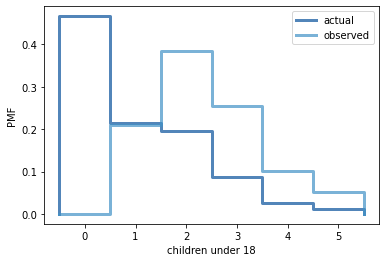

<Figure size 576x432 with 0 Axes>

In [16]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, observed_pmf])
thinkplot.Show(xlabel= 'children under 18', ylabel= 'PMF')

In [17]:
print('The actual mean is', pmf.Mean())
print('The observed mean is', observed_pmf.Mean())

The actual mean is 1.024205155043831
The observed mean is 2.403679100664282


## Exercise 3-2

In [18]:
# calculate mean for a PMF
def PmfMean(pmf):
    mean = 0
    for x, p in pmf.Items():
        a = x * p
        mean += a
    return(mean)   
# test against provided function
PmfMean(pmf), pmf.Mean()

(1.024205155043831, 1.024205155043831)

In [19]:
# calculate variance for PMF
def PmfVar(pmf):
    Var = 0
    for x, p in pmf.Items():
        b = p * (x - PmfMean(pmf)) ** 2
        Var += b
    return(Var)
# test against provided function
PmfVar(pmf), pmf.Var()
        

(1.4128643263531195, 1.4128643263531195)

## Exercise 4-1

In [20]:
live = preg[preg.outcome == 1]
other = live[live.birthord > 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


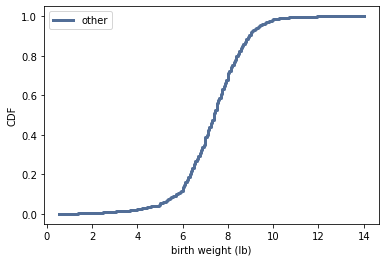

<Figure size 576x432 with 0 Axes>

In [21]:
other_cdf = thinkstats2.Cdf(other.totalwgt_lb, label= 'other')
thinkplot.Cdf(other_cdf)
thinkplot.Show(xlabel= 'birth weight (lb)', ylabel= 'CDF')

In [22]:
my_birthwgt = 8.5
other_cdf.PercentileRank(my_birthwgt)

82.35294117647058

## Exercise 4-2

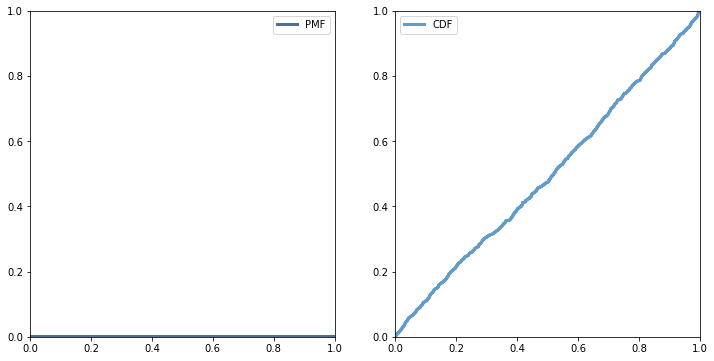

<Figure size 576x432 with 0 Axes>

In [23]:
numbers = np.random.random(1000)
num_pmf = thinkstats2.Pmf(numbers, label= 'PMF')
num_cdf = thinkstats2.Cdf(numbers, label= 'CDF')
thinkplot.PrePlot(cols= 2)
thinkplot.Pmf(num_pmf)
thinkplot.Config(axis= [0, 1, 0, 1])
thinkplot.SubPlot(2)
thinkplot.Cdf(num_cdf)
thinkplot.Show(axis= [0, 1, 0, 1])